In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to load dataset iris
df=pd.read_csv('/content/drive/MyDrive/notebook/housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
#We have classified dataset which want to predict the house price>50 lacs or 
#less than 50 lacs 
#if house price >=50 lacs then 1 otherwise 0 
#T=We have target  : AboveMedianPrice which want to predict 

In [5]:
#Check null values
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [6]:
df.dtypes

LotArea             int64
OverallQual         int64
OverallCond         int64
TotalBsmtSF         int64
FullBath            int64
HalfBath            int64
BedroomAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageArea          int64
AboveMedianPrice    int64
dtype: object

In [7]:
#Select input and output features from dataset 
X=df.drop("AboveMedianPrice",axis=1) #input features
Y=df["AboveMedianPrice"]#output features

In [8]:
#train_test_split  : 70%-30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
#apply scaling on input data means X_train and X_test 
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
#Create a neural network
import tensorflow as tf
#create object of Sequential class
model=tf.keras.Sequential([
   tf.keras.layers.Dense(units=32,activation='relu',input_shape=(X.shape[1],)),
   #hidden layer1
   tf.keras.layers.Dense(units=32,activation='relu'),
   tf.keras.layers.Dense(units=1,activation='sigmoid')                        
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [12]:
df["AboveMedianPrice"].value_counts()

0    732
1    728
Name: AboveMedianPrice, dtype: int64

In [13]:
X.shape

(1460, 10)

In [14]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
#Train the model 
trained_model=model.fit(X_train, Y_train,batch_size=32, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.5898 - accuracy: 0.6663
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8601
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8728
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2810 - accuracy: 0.8845
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.8924
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.8953
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9031
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2328 - accuracy: 0.9041
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2268 - accuracy: 0.9080
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.9119
Epoch 11/

In [16]:
#Check loss of training and training's score
model.evaluate(X_train,Y_train)

32/32 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9638


[0.10766421258449554, 0.9637964963912964]

In [17]:
#Check loss of testing and testing's score
model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8767


[0.28381139039993286, 0.8767123222351074]

In [18]:
#Here training's score > testing's score or training's loss<testing's loss
#means model is overfit

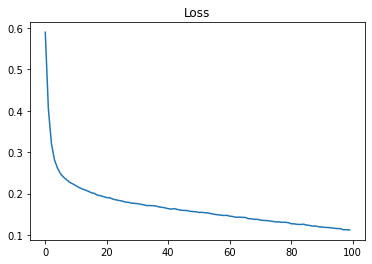

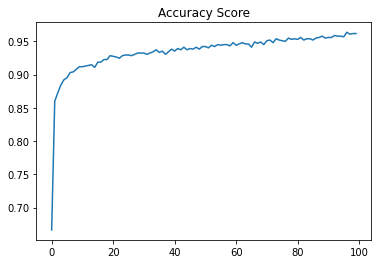

In [19]:
plt.plot(trained_model.history['loss'])
plt.title("Loss")
plt.show()
plt.plot(trained_model.history['accuracy'])
plt.title('Accuracy Score')
plt.show()

In [20]:
#To reduced overfit situation , apply Regularisation 
#There are 2 types of Regularisation : 1. Lasso (L1) and 2.Ridge(L2)

 #kernel_regularizer=regularizers.l2(0.01) (RSS+lambda*sum(all weight)^2)
 #lambda means hyperparameter  and l2 means ridge regularisation
 


In [21]:
#!pip install keras

In [22]:
#create object of Sequential class after apply Regularisation
from keras import regularizers
model1=tf.keras.Sequential([
   tf.keras.layers.Dense(units=32,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(X.shape[1],)),
   #hidden layer1
   tf.keras.layers.Dense(units=32,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01)),
   tf.keras.layers.Dense(units=1,activation='sigmoid',
                         kernel_regularizer=regularizers.l2(0.01))                        
])

In [23]:
#compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#train the model
trained_model1 = model1.fit(X_train, Y_train,
          batch_size=32, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0029 - accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8022 - accuracy: 0.8816
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8933
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.9002
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.8973
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8982
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.9022
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.9051
Epoch 11/

In [25]:
model1.evaluate(X_train, Y_train)

32/32 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.9090


[0.29989689588546753, 0.9090019464492798]

In [26]:
model1.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8904


[0.29230210185050964, 0.8904109597206116]

In [28]:
#find prediction
Y_pred=model1.predict(X_test)

In [30]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       221
           1       0.88      0.90      0.89       217

    accuracy                           0.89       438
   macro avg       0.89      0.89      0.89       438
weighted avg       0.89      0.89      0.89       438

[[194  27]
 [ 21 196]]


In [33]:
#Create a Neural network 
model2=model1=tf.keras.Sequential([
   tf.keras.layers.Dense(units=1000,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(X.shape[1],)),
   #hidden layer1
   tf.keras.layers.Dense(units=1000,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01)),
  #hidden layer2
  tf.keras.layers.Dense(units=1000,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01)),
                         #hidden layer3
   tf.keras.layers.Dense(units=1,activation='sigmoid',
                         kernel_regularizer=regularizers.l2(0.01))                        
])

In [34]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
#train the model
trained_model2 = model2.fit(X_train, Y_train,
          batch_size=32, epochs=100)
          

Epoch 1/100
32/32 [==============================] - 3s 45ms/step - loss: 9.7882 - accuracy: 0.8757
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 1.2817 - accuracy: 0.8982
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4465 - accuracy: 0.9070
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3878 - accuracy: 0.8992
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3619 - accuracy: 0.9051
Epoch 6/100
32/32 [==============================] - 1s 44ms/step - loss: 0.3683 - accuracy: 0.9022
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3571 - accuracy: 0.8973
Epoch 8/100
32/32 [==============================] - 2s 52ms/step - loss: 0.3429 - accuracy: 0.9119
Epoch 9/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3388 - accuracy: 0.9012
Epoch 10/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3376 - accuracy: 0.9090

In [36]:
model2.evaluate(X_train, Y_train)

32/32 [==============================] - 1s 14ms/step - loss: 0.3061 - accuracy: 0.9070


[0.3060808479785919, 0.9070450067520142]

In [37]:
model2.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 12ms/step - loss: 0.3103 - accuracy: 0.9018


[0.31030702590942383, 0.9018265008926392]

In [40]:
from keras.layers import Dropout
model3=tf.keras.Sequential([
   tf.keras.layers.Dense(units=1000,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(X.shape[1],)),
    Dropout(0.5),  #50% neuron deactivate
   #hidden layer1
   tf.keras.layers.Dense(units=1000,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),  #50% neuron deactivate
  #hidden layer2
  tf.keras.layers.Dense(units=1000,activation='relu',
                         kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),  #50% neuron deactivate
                         #hidden layer3
   tf.keras.layers.Dense(units=1,activation='sigmoid',
                         kernel_regularizer=regularizers.l2(0.01))                        
])

In [41]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              11000     
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_15 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [42]:
#compile the model
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
#train the model
trained_model3 = model3.fit(X_train, Y_train,
          batch_size=32, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 49ms/step - loss: 10.5026 - accuracy: 0.8620
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 1.7713 - accuracy: 0.8963
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.6149 - accuracy: 0.8953
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4858 - accuracy: 0.9012
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4227 - accuracy: 0.9070
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3972 - accuracy: 0.9119
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3918 - accuracy: 0.9100
Epoch 8/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3897 - accuracy: 0.9002
Epoch 9/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3873 - accuracy: 0.8992
Epoch 10/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3706 - accuracy: 0.913

In [44]:
model3.evaluate(X_train, Y_train)

32/32 [==============================] - 0s 8ms/step - loss: 0.3256 - accuracy: 0.9051


[0.3256123661994934, 0.9050880670547485]

In [46]:
model3.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.3267 - accuracy: 0.9018


[0.3267301917076111, 0.9018265008926392]